# Magnus Propagator Precision Benchmark

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from timedependent_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=5, suppress=True)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Fit CNOT, Multiple Realizations

In [ ]:
U = tf.convert_to_tensor([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]], dtype=tf.complex128)

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

fit_spinspin(U=U, degree=2, gamma=0, filename= "data/" + "spin-spin_cnot_realization1", grid_size=200, num_iter=500)

  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(2.413389154295112e-07, shape=(), dtype=float64)


  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(2.413389154295112e-07, shape=(), dtype=float64)


In [7]:
tf.random.set_seed(43)
np.random.seed(43)
fit_spinspin(U=U, degree=2, gamma=0, filename= "data/" + "spin-spin_cnot_realization2", grid_size=200, num_iter=500)

  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(6.763631127701541e-05, shape=(), dtype=float64)


In [11]:
tf.random.set_seed(44)
np.random.seed(44)
fit_spinspin(U=U, degree=2, gamma=0, filename= "data/" + "spin-spin_cnot_realization3", grid_size=200, num_iter=500)

  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(7.685303129969443e-08, shape=(), dtype=float64)


In [15]:
model1 = loader("data/" + "spin-spin_cnot_realization1.model")
H_model1 = model1.channel.liouvillian.Hamiltonian

model2 = loader("data/" + "spin-spin_cnot_realization2.model")
H_model2 = model2.channel.liouvillian.Hamiltonian

model3 = loader("data/" + "spin-spin_cnot_realization3.model")
H_model3 = model3.channel.liouvillian.Hamiltonian


In [16]:
print(H_model1.u.numpy())
print(H_model2.u.numpy())
print(H_model3.u.numpy())

[ 1.66077 -1.25413 -1.15268]
[-1.46621 -0.37615  0.16355]
[-2.00826 -0.22086 -0.177  ]


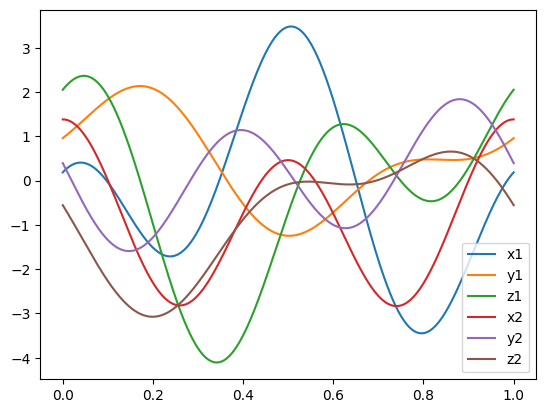

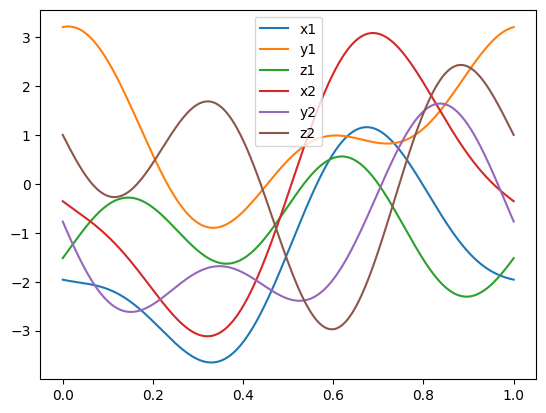

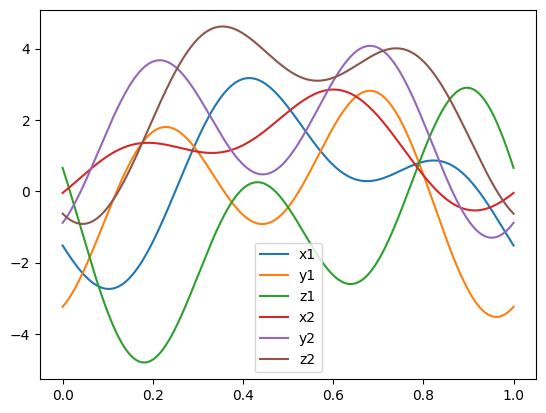

In [17]:
t, signal_list = H_model1.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

t, signal_list = H_model2.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

t, signal_list = H_model3.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()
plt.show()

In [1]:
plt.plot(-np.array(model1.logger.loss_train_list), label="realization 1")
plt.plot(-np.array(model2.logger.loss_train_list), label="realization 2")
plt.plot(-np.array(model3.logger.loss_train_list), label="realization 3")
plt.legend()
plt.show()

NameError: name 'plt' is not defined